In [38]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# **Section 1**

## Question 1

In [17]:
image = Image.open("/content/lenna_image.png")

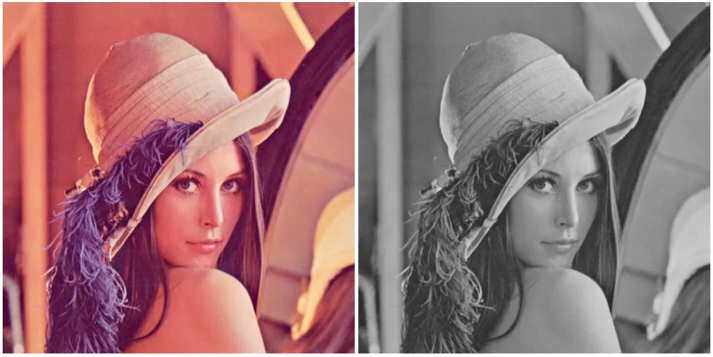

In [18]:
# Displaying the image using the display function
display(image)

## Question 2

In [19]:
# Converting the image into an array
image_array = np.array(image)

In [20]:
image_array

array([[[253, 255, 255, 255],
        [254, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 254, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[253, 255, 255, 255],
        [252, 253, 254, 255],
        [254, 248, 249, 255],
        ...,
        [249, 249, 249, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       [[253, 255, 255, 255],
        [254, 252, 253, 255],
        [240, 220, 220, 255],
        ...,
        [218, 218, 218, 255],
        [255, 255, 255, 255],
        [253, 252, 253, 255]],

       ...,

       [[255, 255, 251, 255],
        [255, 255, 254, 255],
        [254, 255, 255, 255],
        ...,
        [254, 254, 254, 255],
        [253, 253, 253, 255],
        [254, 254, 254, 255]],

       [[255, 255, 251, 255],
        [255, 255, 254, 255],
        [253, 255, 255, 255],
        ...,
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       [[254

In [21]:
# Extracting the row 0-100, column 0-100
row_col_100 = image_array[:100 , :100 , :]

In [22]:
# Converting the array into an image
top_left_portion = Image.fromarray(row_col_100)

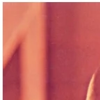

In [23]:
# Displaying the cropped image
display(top_left_portion)

## Question 3

In [24]:
# Converting the image into an array
image_array_colored = np.array(image)

array([[253, 254, 255, ..., 255, 255, 255],
       [253, 252, 254, ..., 249, 254, 254],
       [253, 254, 240, ..., 218, 255, 253],
       ...,
       [255, 255, 254, ..., 254, 253, 254],
       [255, 255, 253, ..., 254, 254, 254],
       [254, 255, 254, ..., 255, 255, 255]], dtype=uint8)
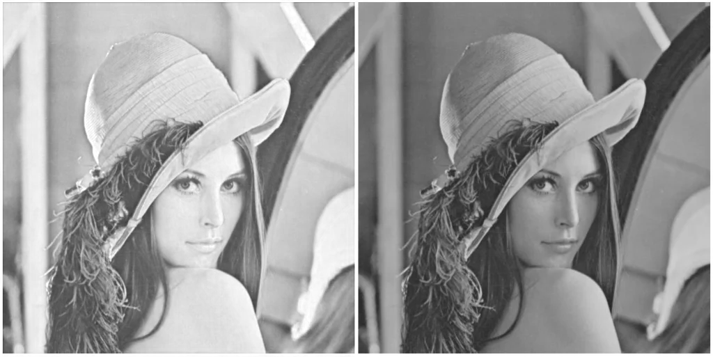

In [25]:
# Getting the red channel
red_channel = image_array_colored[: , : , 0]
display(red_channel)

array([[255, 255, 255, ..., 254, 255, 255],
       [255, 253, 248, ..., 249, 254, 254],
       [255, 252, 220, ..., 218, 255, 252],
       ...,
       [255, 255, 255, ..., 254, 253, 254],
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 254, ..., 255, 255, 255]], dtype=uint8)
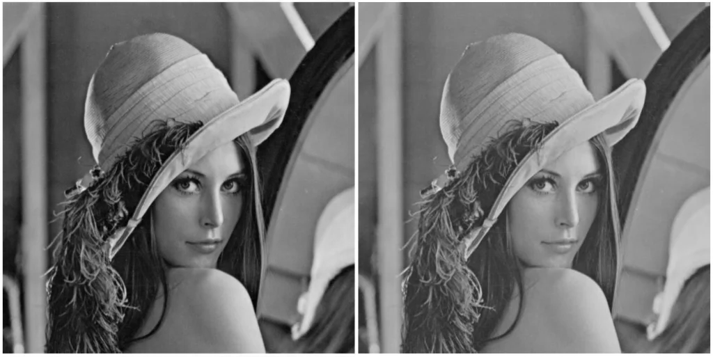

In [26]:
# Extracting the green channel
green_channel = image_array_colored[: , : , 1]
display(green_channel)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 254, 249, ..., 249, 254, 254],
       [255, 253, 220, ..., 218, 255, 253],
       ...,
       [251, 254, 255, ..., 254, 253, 254],
       [251, 254, 255, ..., 254, 254, 254],
       [253, 254, 254, ..., 255, 255, 255]], dtype=uint8)
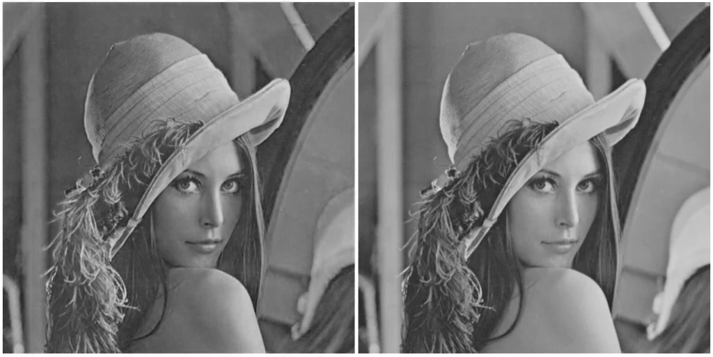

In [27]:
# Extracting the blue channel
blue_channel = image_array_colored[: , : , 2]
display(blue_channel)

## Question 4

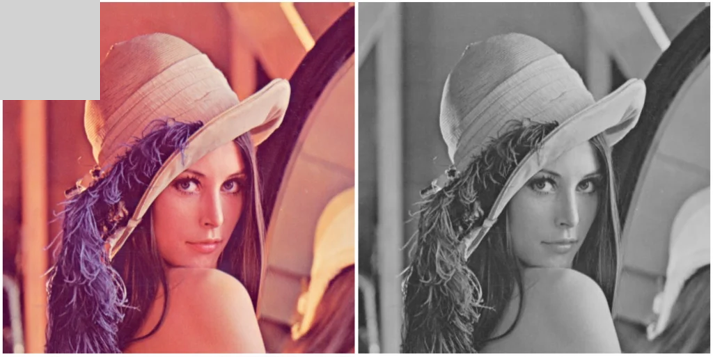

In [33]:
# Set the first 100 rows and first 100 columns to (210, 210, 210)
image_array[:100, :100, :] = [210, 210, 210, 255]  # 255 keeps full opacity

# Displaying the cropped image
top_left_portion = Image.fromarray(image_array)

display(top_left_portion)

# **Section 2**

## Question 1

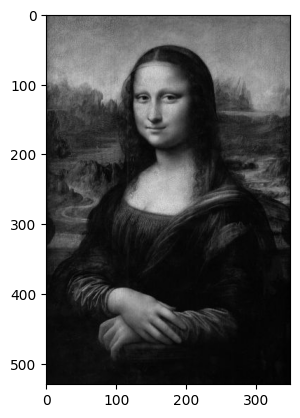

In [77]:
image_grayed = Image.open("/content/monalisa.jpg")

# Convert the image to a NumPy array
image_array_2 = np.array(image_grayed)

# Preparing the image using imshow
plt.imshow(image_array_2)

# Displaying the image
plt.show()

## Question 2

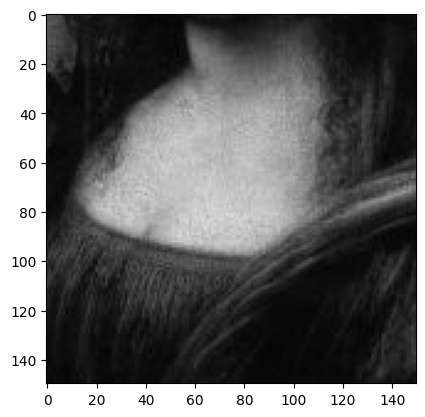

In [86]:
crop_size = 150
height, width = image_grayed.size

row_center = width // 2
row_start = row_center - (crop_size // 2)
row_end = row_center + (crop_size // 2)

column_center = height // 2
column_start = column_center - (crop_size // 2)
column_end = column_center + (crop_size // 2)

centered_150 = image_array_2[row_start:row_end , column_start:column_end , :]

plt.imshow(centered_150)
plt.show()

## Question 3

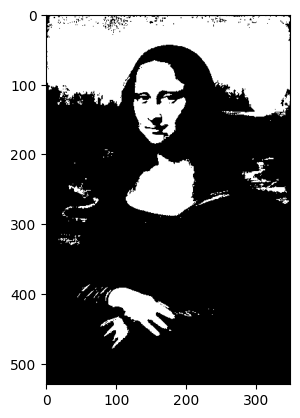

In [93]:
# Convert the image to a NumPy array
image_array_2 = np.array(image_grayed)
# np.where accesses each element of an array
binary_image = np.where(image_array < 100, 0, 255)
plt.imshow(binary_image)
plt.show()

## Question 4

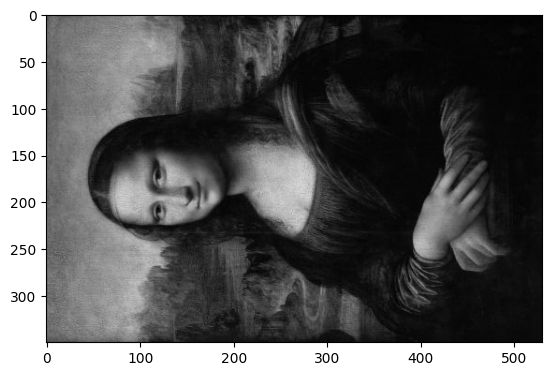

In [100]:
# Using the rotate method from the pillow lib and expanding true because we do want to loose the image's details
rotated_image = image.rotate(90, expand=True)
rotated_image_array_2 = np.array(rotated_image)
# np.where accesses each element of an array
plt.imshow(rotated_image_array_2)
plt.show()

## Question 5

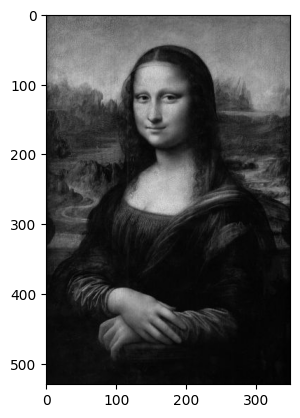

In [134]:
rgb_gray_image = image.convert("RGB")
rgb_gray_image_arr = np.array(rgb_gray_image)
plt.imshow(rgb_gray_image_arr)
plt.show()

# **Section 3 - PCA**

In [ ]:
# First, we open the image and convert it into a gray scaled image
image = Image.open("/content/lenna_image.png").convert("L")

In [ ]:
# Verifying
display(image)

In [ ]:
# Converting the gray scaled image into an array to reduce dimensions
image_array = np.array(image)

In [ ]:
# We then extract the height width of the image
height,width = image_array.shape

In [ ]:
data = image_array.reshape(height,width)

In [ ]:
data

In [ ]:
# Taking out the mean to center the data points
mean = np.mean(data,axis=0)

In [ ]:
# Storing the centered on a variable
centered_data = data - mean

In [ ]:
# Finding the covariance matrix from the centered data to capture the relationships between the pixels
cov_matrix = np.cov(centered_data,rowvar=False)

In [ ]:
# Finding the eigen values and vectors to find the principal component with highest variance
eigenvalues,eigenvectors = np.linalg.eigh(cov_matrix)

In [ ]:
# We sort the eigen values according to the values with the highest variance at the top
sorted_indices = np.argsort(eigenvalues)[:: -1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors [: , sorted_indices ]

In [ ]:


explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

In [ ]:
k = 50 # Choose k principal components
components = eigenvectors [: , : k ]

In [ ]:
# Finding dot product as we know multiplying eigen vector gives anotehr vector with no direction change but the magnitude
compressed_data = np.dot(centered_data,components)

In [ ]:
decompressed_data = np.dot(compressed_data,components.T)+mean

In [ ]:
plt . figure ( figsize =(12 , 6) )
# Original Image
plt . subplot (1 , 3 , 1)
plt . imshow ( image_array , cmap ="gray")
plt . title (" Original Image ")
plt . axis ("off")
plt . subplot (1 , 3 , 2)
plt . imshow ( compressed_data , cmap ="gray", aspect ="auto")
plt . title ( f" Compressed Image (k={k})")
plt . axis ("off")
# Decompressed Image
plt . subplot (1 , 3 , 3)
plt . imshow ( decompressed_data , cmap ="gray")
plt . title (" Decompressed Image ")
plt . axis ("off")
plt . tight_layout ()
plt . show ()